<a href="https://colab.research.google.com/github/AdrianDiaz99/Inteligencia-Artificial/blob/master/Fuzzy_Logic_Elegir_Carrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

logica_matematica = ctrl.Antecedent(np.arange(0,11,1), 'logica-matematica')
ciencias_sociales = ctrl.Antecedent(np.arange(0,11,1), 'ciencias-sociales')
habilidad_computacional = ctrl.Antecedent(np.arange(0,11,1), 'habilidad-computacional')
razonamiento = ctrl.Antecedent(np.arange(0,11,1), 'razonamiento')
liderazgo = ctrl.Antecedent(np.arange(0,11,1), 'liderazgo')
creatividad = ctrl.Antecedent(np.arange(0,11,1), 'creatividad')
persuacion = ctrl.Antecedent(np.arange(0,11,1), 'persuacion')
iniciativa = ctrl.Antecedent(np.arange(0,11,1), 'iniciativa')
seguridad = ctrl.Antecedent(np.arange(0,11,1), 'seguridad')
disciplina = ctrl.Antecedent(np.arange(0,11,1), 'disciplina')

carrera = ctrl.Consequent(np.arange(0,26,1), 'carrera')

logica_matematica.automf(3)
ciencias_sociales.automf(3)
habilidad_computacional.automf(3)
razonamiento.automf(3)
liderazgo.automf(3)
creatividad.automf(3)
persuacion.automf(3)
iniciativa.automf(3)
seguridad.automf(3)
disciplina.automf(3)

carrera['ing. sistemas'] = fuzz.trimf(carrera.universe, [0, 0, 13])
carrera['ing. industrial'] = fuzz.trimf(carrera.universe, [0, 13, 25])
carrera['ing. mecatronica'] = fuzz.trimf(carrera.universe, [5, 10, 30])
carrera['adm. empresas'] = fuzz.trimf(carrera.universe, [10, 15, 20])
carrera['contabilidad'] = fuzz.trimf(carrera.universe, [0, 10, 20])
carrera['arquitectura'] = fuzz.trimf(carrera.universe, [5, 15, 20])
carrera['leyes'] = fuzz.trimf(carrera.universe, [15, 15, 25])

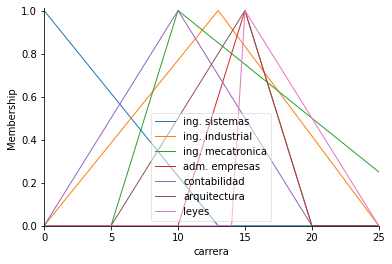

In [23]:
carrera.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f64cd9c8dd0>)

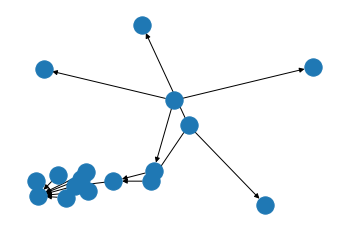

In [41]:
rule1 = ctrl.Rule(logica_matematica['good'] & habilidad_computacional['good'], carrera['ing. mecatronica'])
rule2 = ctrl.Rule( (liderazgo['good'] | persuacion['good']) & seguridad['average'] & iniciativa['average'], carrera['ing. industrial'])
rule3 = ctrl.Rule( habilidad_computacional['good'] & ( razonamiento['average'] | logica_matematica['average'] ) , carrera['ing. sistemas'])
rule4 = ctrl.Rule(liderazgo['good'] & seguridad['average'] & iniciativa['poor'], carrera['adm. empresas'])
rule5 = ctrl.Rule(logica_matematica['average'] & razonamiento['average'], carrera['contabilidad'])
rule6 = ctrl.Rule(disciplina['average'] & creatividad['good'] & razonamiento['poor'], carrera['arquitectura'])
rule7 = ctrl.Rule(ciencias_sociales['good'] & persuacion['good'] & iniciativa['average'], carrera['leyes'])

rule1.view()

In [48]:
carrera_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

In [49]:
carrera_elegida = ctrl.ControlSystemSimulation(carrera_ctrl)

In [51]:
carrera_elegida.input['logica-matematica'] = 5
carrera_elegida.input['ciencias-sociales'] = 7
carrera_elegida.input['habilidad-computacional'] = 5
carrera_elegida.input['razonamiento'] = 1
carrera_elegida.input['liderazgo'] = 1
carrera_elegida.input['creatividad'] = 8
carrera_elegida.input['persuacion'] = 1
carrera_elegida.input['iniciativa'] = 5
carrera_elegida.input['seguridad'] = 1
carrera_elegida.input['disciplina'] = 1

carrera_elegida.compute()

10.24324324324324


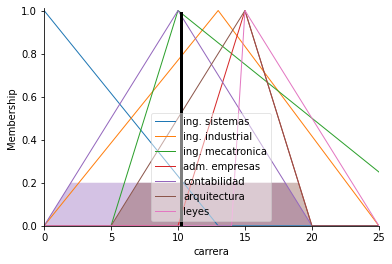

In [52]:
print(carrera_elegida.output['carrera'])
carrera.view(sim=carrera_elegida)